In [1]:
from numpy import sin, cos, pi, exp
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from IPython.display import Audio

# Configure default pyplot settings
plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

# Enable importing from modules in top-level directory
from sys import path
if path[0] != '..': path.insert(0, '..')

<img src="figures/NTNU_logo_vertical.svg" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# Continuous Signals and their Representations

* **AIS2201 - Signal Processing**
* **Week 34**
* **Lecturer: Kai Erik Hoff**

# Topics

* What is the frequency domain?
* Spectral analysis in `Python`
* Linear and Logarithmic scale
* Spectrograms


## About Signals

<div width="100%">
    <img src="figures/Fig1_signaleksempel.png" align="right" width="35%"/>
    <div style="width: 55%">
    <br>
    <ul>
      <li>A <i>signal</i> can be described as some measurable quantity carrying information. </li>
      <ul><li>DSP systems typically use electrical signals.</li>
          <li>Can be voltage output from sensors, antennas etc.</li></ul>
      <li>1-Dimensional signals of primary concern for this course</li>
      <ul><li>Eg. time-varying voltage signal.</li>
      <li>Sound, IMU measurements, EMG etc.</li></ul>
      <li>Multidimensional signals can also occur.</li>
      <ul><li>Images are considered to be 2-dimensional. Signal value (color) varies with both $x$- and $y$ coordinates.</li>
      <li>Video counts as a 3-dimensional signal, where time is an additional variable compared to images.</li></ul>
    </ul>  
    </div>
</div> 

<br>
<br>


# Analyzing signals

* Signal Processing Theory provides a number of tools for analyzing signals.
* Based on inspecting signal properties in the *time domain* or the *frequency domain*.

### Time domain
* approx. 1 second window of an EKG-signal.

<img src="figures/ECG_signal_plot.svg" align="center" width="50%" />

### Frequency domain
* EKG signal frequency spectrum.

<img src="figures/ECG_spectrum_plot.svg" align="center" width= "60%" />

## What is the frequency spectrum?


* A function $X(f)$ describing the *frequency content* of a time-domain signal $x(t)$
    * Simplified explanation: represents the decomposition of a time-domain signal $x(t)$ into constituent sinusoidal waves / sinusoids.$^*$

<img src="figures/ECG_spectrum_3D.svg" width="100%" />

$^*$ useful explanation for grasping the concept, but not entirely mathematically accurate. This will be explained in more detail later.

# Why do we need spectral representation?

* The composition of a signal is often much more evident in the frequency domain compared to the time domain.

* *Example: ecg signal subject to 50Hz mains interference.*

<img src="figures/ECG_signal_mains_noise.svg" style="width: 70%; margin-left: 100px" />

# Applications of spectral representation


<div style="width: 100%;">
    <img src="figures/Fig3_SpectrumAnalyzer.png" style="float: right; width: 40%" />
    <div style="width: 50%">
    <ul>
      <li>Signal analysis.</li>
      <ul>
          <li> Overview of Signal Properties</li>
          <li> Measuring signal quality</li>
          <li> Frequency-domain analysis of a physical system</li>
          <li> Identifying sources of disturbance in a system</li>
          <li> Much more.. </li>
        </ul>
      <li>Processing.</li>
      <ul>
          <li>Voice recognition (and other pattern recognition)</li>
          <li>Compression</li>
          <li>Filtering</li>
          <li>etc.</li>
      </ul>
    </ul>  
    </div>
</div> 

# Displaying the frequency spectrum using Python

-0.017109642338161535 0.0


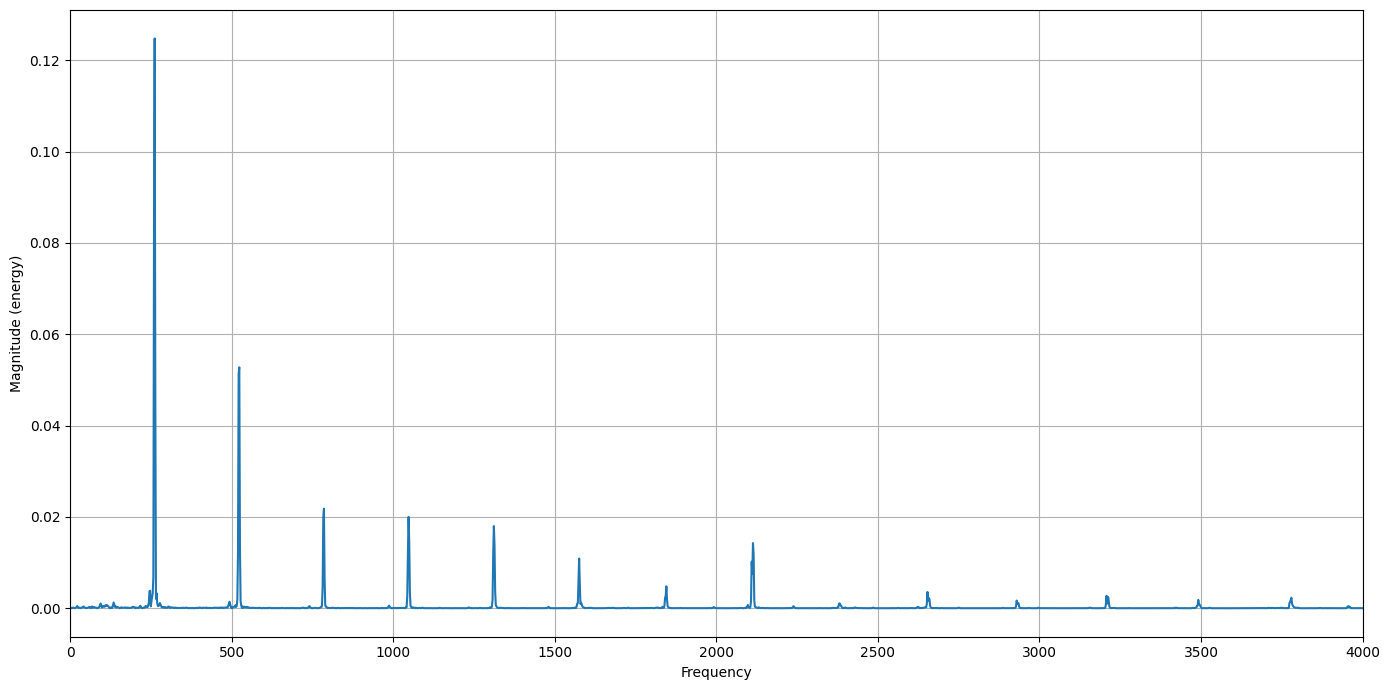

In [2]:
from scipy.io import wavfile
from IPython.display import Audio
fs, sampleData = wavfile.read("data/piano.wav") # Load audio file
x = sampleData/max(abs(sampleData)) # Normaliser til -1 < x[n] < 1 og konverter til flyttall 

y = x.copy()
y[0] = 0
print(x[0], y[0])

%matplotlib inline
plt.figure(figsize=(14,7))
plt.magnitude_spectrum(x, Fs=fs)
plt.xlim([0, 4000])
Audio(sampleData, rate=fs)

## Example demo revisited: audio signal analyzer

In [3]:
from IPython.display import Audio
from scipy.io import wavfile
fs, data = wavfile.read(r'../data/orca.wav') # les audiofilen 'orca.wav' og lagre til variablene 'fs' og 'data'
xn = data/0x8000
Audio(xn, rate=fs)

Output()

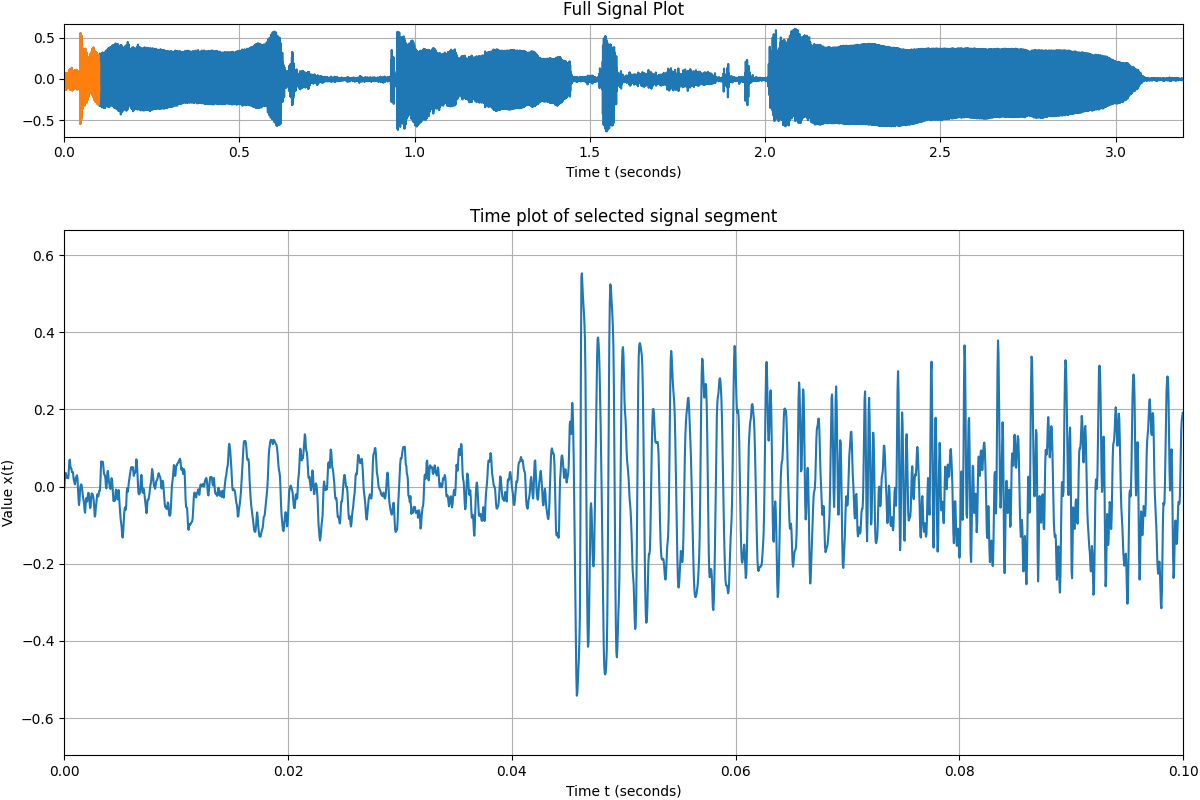

In [4]:
%matplotlib ipympl
from demos import SignalAnalyzer
SignalAnalyzer(xn, fs);

# Linear and Logarithmic Scale
* Linear scale is intuitive, and usually how "raw" frequency data is stored.
    * The height of a frequency "spike" is directly proportional to the amplitude of the frequency component it represents.
* Logarithmic scale often used for spectral analysis of signals.
    * Each "step" along y-axis represents a *mulitplicative* increase in signal power relative to the previous step.
    * Strong signal components do not "overshadow" weak signal components

-0.017109642338161535 0.0


(0.0, 4000.0)

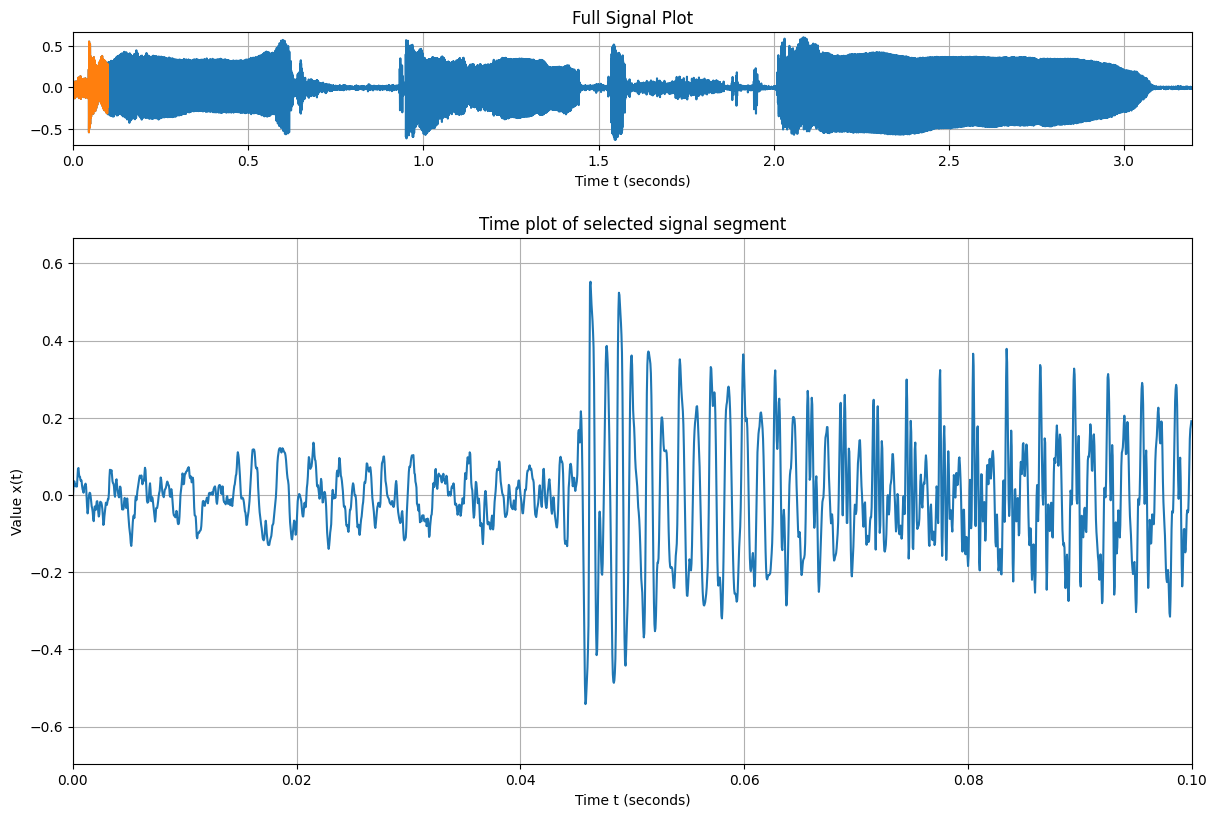

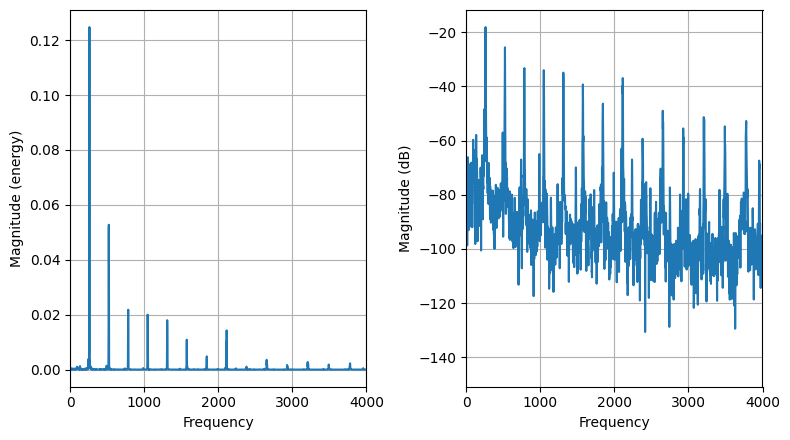

In [5]:
from scipy.io import wavfile
from IPython.display import Audio
fs, sampleData = wavfile.read("data/piano.wav") # Load audio file
x = sampleData/max(abs(sampleData)) # Normaliser til -1 < x[n] < 1 og konverter til flyttall 

y = x.copy()
y[0] = 0
print(x[0], y[0])

%matplotlib inline
plt.figure()
plt.subplot(1,2,1)
plt.magnitude_spectrum(x, Fs=fs, scale="linear")
plt.xlim([0, 4000])
plt.subplot(1,2,2)
plt.magnitude_spectrum(x, Fs=fs, scale="dB")
plt.xlim([0, 4000])

# Log scale units

## Decibel (dB)
* Typically used for for comparing the relative **power** $P$ of **two** signals 
    * E.g. input/output of a filter. Measure of filter amplification/attenuation
$$\begin{align}
\text{Amplification (dB)} &= 10 \cdot \log\left(\frac{P_y}{P_x}\right) \\
&= 10 \cdot \log\left(\frac{|A_y|^2}{|A_x|^2}\right) \\
&= 20 \cdot \log\left(\frac{|A_y|}{|A_x|}\right)
\end{align}$$

## Decibel milliwatt (dBm)

* A measure of absolute signal power using $1 \text{ milliWatt (mW)}$ as reference (less common):

$$P_{dBm} = 10 \cdot \log\left(\frac{P}{1\text{ mW}}\right)$$

# Signal Power defined


<img src="figures/Signal_Energy.svg" width="70%" style="margin-left:150px" />

* **Energy:** Total work perfomred by signal
* **Power:** Momentary energy

$$P_x = \lim_{T\rightarrow \infty} \frac{1}{2T}\int_{-T}^{T} |x^2(t)| dt $$

# Log scale in spectral plots

### $\text{dB}$ per frequency unit (e.g. $\text{Hz}$)

* Primarily useful when comparing the power of different frequency components relative to each other
$$
\begin{align}
P_{xx}(f)_{dB} &= 10 \cdot \log\left(P_{xx}(f)\right) \\
&= 20 \cdot \log(|X(f)|)
\end{align}$$
* Not scaled to a reference. More information needed to infer **absolute** power for a frequency component.
* Most common spectrum plot encountered when working with digital signals
    - Working with arbitrarily scaled numbers, without inherent mapping to corresponding voltage levels etc...

### $\text{dBm}$ per frequency unit (e.g. $\text{Hz}$)
* Absolute power of a signal (e.g. radio signal) as a function of frequency.
$$P_{xx}(f)_{dBm} = 20 \cdot \log\left(\frac{P_{xx}(f)}{1\text{ mW}}\right)$$
* Usually only encountered when operating specialized spectral analysis tools
* Less commonly used plot for specialized situations.
    * Requires special attention when scaling 
    * The *relative* strength of different frequency components in a signal is usually of more interest than the objective power of each frequency unit

## Example:
If spike $\boldsymbol{x}$ represents a sinusoid with amplitude $A=20\text{V}$, what is the amplitude of the sinusoid represented by spike $\boldsymbol{y}$?
<img src="figures/log_spectrum_example.svg" width="70%" style="margin-left:150px" />

## Signal analysis in the time- *and* frequency domain

* A spectrogram is used to map the properties of a signal in 3 dimensions:
    - Time *(usually x-axis)*
    - Frequency *(usually y-axis)*
    - Signal magnitude / power *(Represented using color map)*
* Useful for analyzing signals where the frequency content changes over time.
    - Relevant for almost all "real-world" signals. 
<img src="figures/Fig19_Spectrogram2.png" style="width: 80%; margin-left: 100px" />

## Spectrograms $\approx$ sheet music?


<div style="width: 100%;">
    <img src="figures/Fig18_Spectrogram1.png" style="float: right; width: 60%" />
    <div style="width: 30%">
        <br>
    <ul>
      <li>Sheet music uses a similar approach to describing frequency content (pitch) over time.</li>
    </ul>  
    </div>
</div> 

# Spectrograms in Python

Text(0, 0.5, 'Frequency $f$ (Hz)')

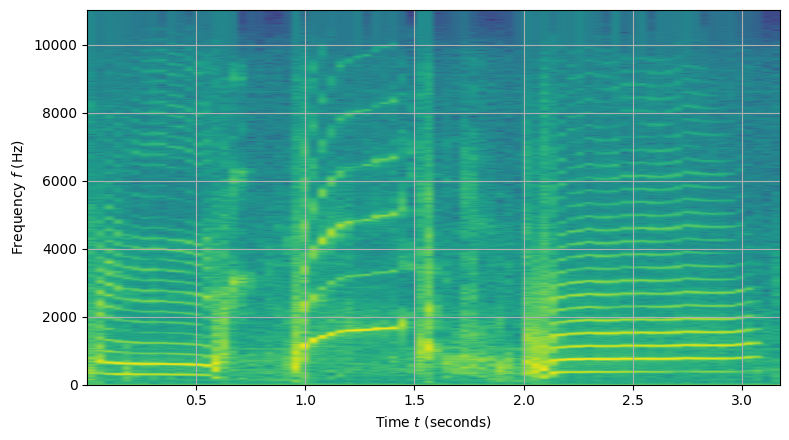

In [6]:
%matplotlib inline
fs, data = wavfile.read(r'../data/orca.wav') # les audiofilen 'orca.wav' og lagre til variablene 'fs' og 'data'
xn = data/0x8000
plt.figure()
plt.specgram(xn, NFFT=1024, pad_to=2*1024, window=sig.windows.hamming(1024), Fs=fs);
plt.xlabel("Time $t$ (seconds)")
plt.ylabel("Frequency $f$ (Hz)")

## Quiz: what melody does the spectrogram show?

(0.0, 600.0)

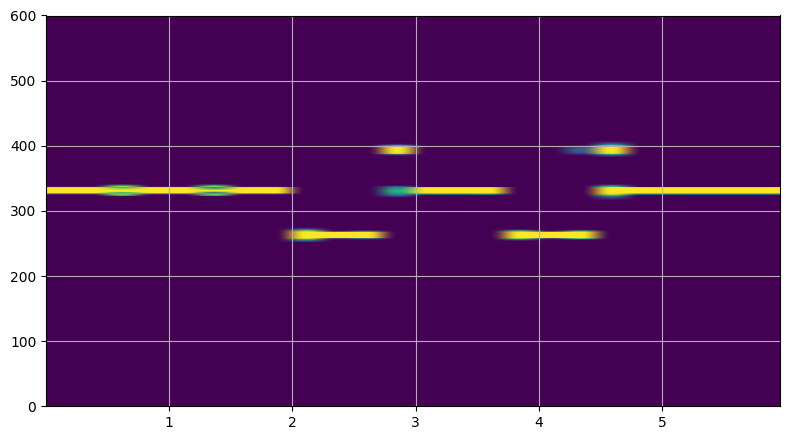

In [14]:
import scipy.signal as sig
from scipy.io import wavfile
%matplotlib inline

fs, x_melody= wavfile.read("../data/mystery_music.wav")
plt.figure()
plt.specgram(x_melody, NFFT=4096, pad_to=2*4096, window=sig.windows.hamming(4096), Fs=fs, vmin=-30, vmax=-20);
plt.ylim(ymax=600)


In [10]:
Audio(x_melody, rate=fs)

# Summary:

* The frequency spectrum a signal shows the composition of said signal in terms of sinusoids
* Presented in linear or logarithmic scale (dB)
* 

# Any Questions?

Interesting video explaining the uncertainty principle in terms of spectral analysis: <br>
[https://www.youtube.com/watch?v=MBnnXbOM5S4](https://www.youtube.com/watch?v=MBnnXbOM5S4)